# Importing Libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline
import seaborn as sns
sns.set()

#Importing warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Reading in the data

In [2]:
train = pd.read_csv('D:/Titanic Survival Competition/titanic/train.csv')
test = pd.read_csv('D:/Titanic Survival Competition/titanic/test.csv')

# Exploratory Data Analysis and basic visualizations

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Median male and female ages

In [5]:
train.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

No. of males and females on-board

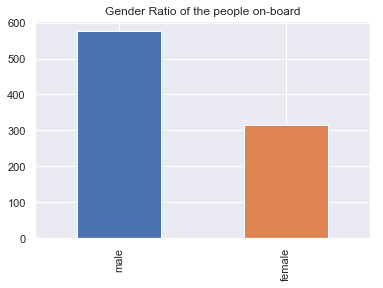

In [6]:
train['Sex'].value_counts().plot(kind = 'bar', title = 'Gender Ratio of the people on-board')

Statistical summary of fares

In [7]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

No. of people embarked from different ports

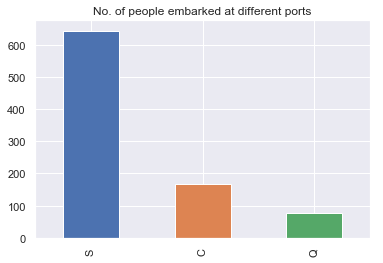

In [8]:
train['Embarked'].value_counts().plot(kind = 'bar', title = 'No. of people embarked at different ports')

No. of passengers by Class

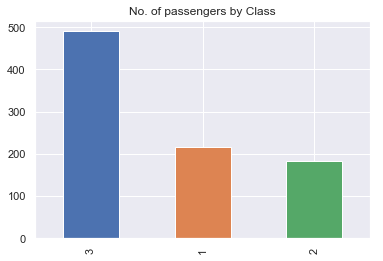

In [9]:
train['Pclass'].value_counts().plot(kind = 'bar', title = 'No. of passengers by Class')

No. of passengers Survived(1) and Not-Survived(0)

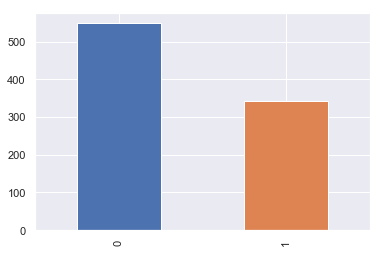

In [10]:
train['Survived'].value_counts().plot(kind = 'bar')

# Categorical Analysis and Visualizations with Features

Plotting a grid of age distribution and survival rates among different ages as a function of Passenger Class (Pclass) and Sex.

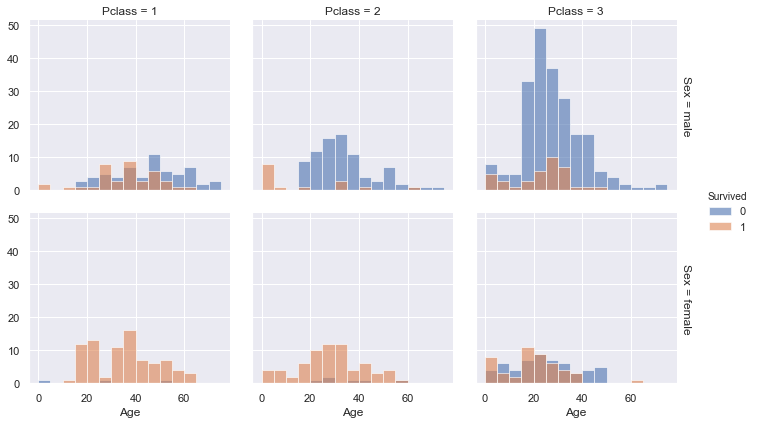

In [11]:
#Using numpy arange function to determine the range of ages and step to determine the width of single bar  
bins = np.arange(0, 80, 5)

#Using seaborn Facetgrid to plot multiplot grid 
g = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived', margin_titles = True, size = 3, aspect = 1.1)

#plotting a distribution plot (Histogram) of the age distribution and survival along the age distribution 
g.map(sns.distplot, 'Age', kde = False, bins = bins, hist_kws = dict(alpha = 0.6))
g.add_legend()  
plt.show() 

The plots clearly show greater no. of women had survived in our trainin set and so, in general women had a greater chance of survival. 
We also see from the plot that quite a large fraction of the passengers belonging to passenger class 1 survived, where almost all of the women belonging to passenger class1 survived.
Also, a large majority of men belonging to the Passenger Class 3 couldn't survive.

Plotting a grid of fare distribution and survival rates as a function of Sex and Passenger class (Pclass).

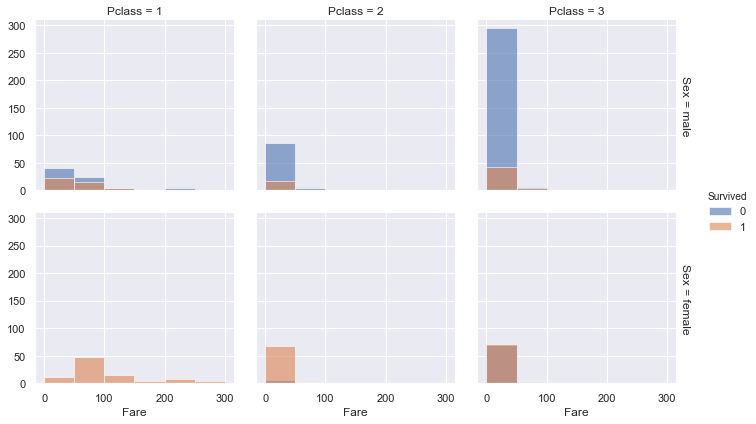

In [12]:
#Using numpy arange function to determine the range of fares
bins = np.arange(0, 350, 50)

#Using seaborn FacetGrid to plot multiplot grid
g = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived', margin_titles = True, size = 3, aspect = 1.1)

#Plotting a distribution plot(Histogram) of fare distribution 
g.map(sns.distplot, 'Fare', kde = False, bins = bins, hist_kws = dict(alpha = 0.6))
g.add_legend()  
plt.show()  

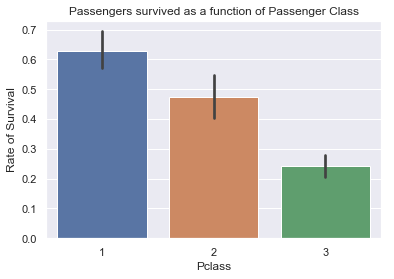

In [13]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Rate of Survival')
plt.title('Passengers survived as a function of Passenger Class')
plt.show()

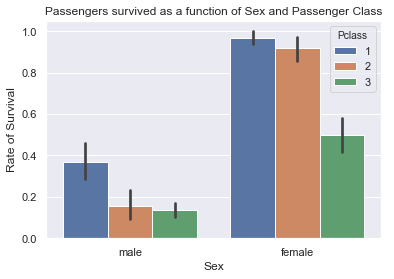

In [14]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train)
plt.ylabel('Rate of Survival')
plt.title('Passengers survived as a function of Sex and Passenger Class')
plt.show()

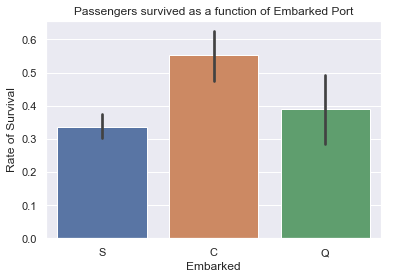

In [15]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.ylabel('Rate of Survival')
plt.title('Passengers survived as a function of Embarked Port')
plt.show()

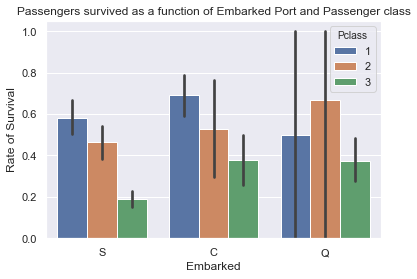

In [16]:
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Pclass', data = train)
plt.ylabel('Rate of Survival')
plt.title('Passengers survived as a function of Embarked Port and Passenger class')
plt.show()

No. of passengers that embarked from different ports with respect to their ticket class

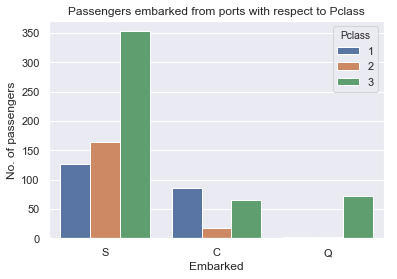

In [17]:
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train)
plt.ylabel('No. of passengers')
plt.title('Passengers embarked from ports with respect to Pclass')
plt.show()

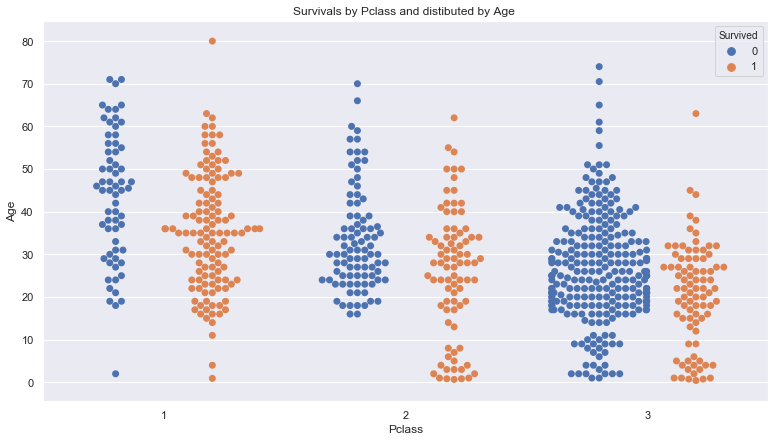

In [18]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=train , size=7, ax=ax)
plt.title('Survivals by Pclass and distibuted by Age ')
plt.show()

Now let's further analyze the above swarm plot by factorizing it according to Sex

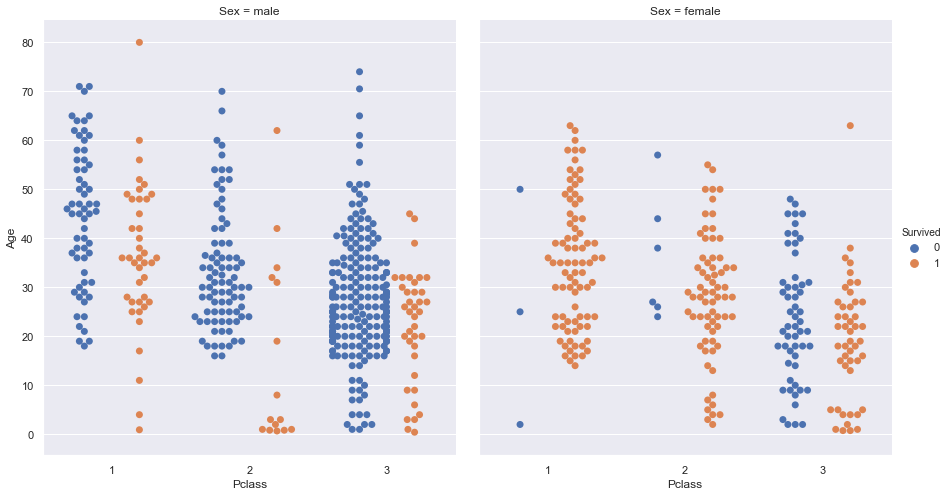

In [19]:
sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=train, kind="swarm",
               split=True, size=7, aspect=.9, s=7)

# Feature Engineering & Data Wrangling

Constructing some new and more influential features from existing features that can help in making further optimization processes simpler.

In [20]:
    #Combining the Siblings-Spouse and Parents-Children coluns to a single Family column
train['Familysize'] = train['SibSp'] + train['Parch'] + 1
test['Familysize'] = test['SibSp'] + test['Parch'] + 1
    
    #New column 'Single' with Family size 1 
train['Single'] = 0
train.loc[(train.Familysize == 1), 'Single'] = 1

test['Single'] = 0
test.loc[(test.Familysize == 1), 'Single'] = 1

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Single
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


The Name column doesn't seem to be a potential feature in deriving whether he/she would survive or not. But, the titles of these names would be very useful in gaining insight about the chances of survival. We will look for such an insight after extracting a column named Title from the Nme column.

In [22]:
#Extracting the title of passengers from the Name column
train['Title'] = 0
test['Title'] = 0

#Extracting the salutations
train['Title'] = train.Name.str.extract(r'([A-Za-z]+)\.')
test['Title'] = test.Name.str.extract(r'([A-Za-z]+)\.')

So, we have managed to extract the salutations from the name on the basis of which we can now analyse if the salutations has some relation with the importance of the person and thus some correlation with their survival.

In [24]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Don           1
Jonkheer      1
Mme           1
Countess      1
Sir           1
Ms            1
Lady          1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64


Let's analyse the correlation of the salutations/designation that a person carries with the rate of survival with the help of a bar graph.

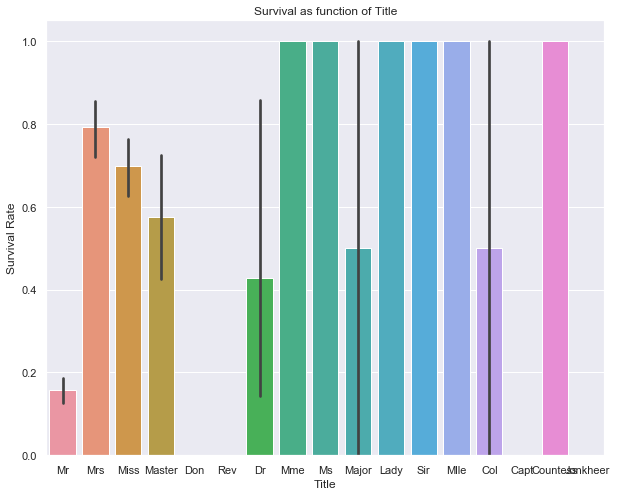

In [25]:
plt.subplots(figsize=(10,8))
sns.barplot(x = 'Title' , y = 'Survived' , data = train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Title")
plt.show()

As is evident from the above bar plot that salutations does affect the chances of survival. For eg. passengers with salutations like Major, Sir, Mme, Ms, Capt have almost all survived.
Also, when observed carefully, in general, females tend to have more chances of survival than males, as was observed from earlier analysis.

# Data Wrangling 

Removing unwanted features(i.e features that are of no use anymore and have been used to build more useful features)

Dealing with missing values

Drop the following columns

In [26]:
train.drop(['SibSp','Parch','Name','Cabin','Ticket'], axis = 1, inplace = True)
test.drop(['SibSp','Parch','Name','Cabin','Ticket'], axis = 1, inplace = True)

Filling missing values for the following features using median, mode strategies

In [27]:
#Using the mode strategy to fill missing values in the Title column
train['Title'] = train['Title'].fillna(train['Title'].mode().iloc[0])
test['Title'] = test['Title'].fillna(test['Title'].mode().iloc[0])

In [28]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
Familysize     891 non-null int64
Single         891 non-null int64
Title          891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
Familysize     418 non-null int64
Single         418 non-null int64
Title          418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


It seems we have some missing values that need to be imputed in the age, Fare and Embarked features.

In [29]:
pd.options.mode.chained_assignment = None
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [30]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode().iloc[0])

In [31]:
train.loc[(train.Age.isnull()) & (train.Title == 'Mr'),'Age'] = train.Age[train.Title == "Mr"].mean()
train.loc[(train.Age.isnull()) & (train.Title == 'Miss'),'Age'] = train.Age[train.Title == "Miss"].mean()
train.loc[(train.Age.isnull()) & (train.Title == 'Mrs'),'Age'] = train.Age[train.Title == "Mrs"].mean()
train.loc[(train.Age.isnull()) & (train.Title == 'Master'),'Age'] = train.Age[train.Title == "Master"].mean()
train.loc[(train.Age.isnull()) & (train.Title == 'Dr'),'Age'] = train.Age[train.Title == "Dr"].mean()
train.loc[(train.Age.isnull()) & (train.Title == 'Ms'),'Age'] = train.Age[train.Title == "Ms"].mean()

In [32]:
test.loc[(test.Age.isnull()) & (test.Title == 'Mr'),'Age'] = test.Age[test.Title == "Mr"].mean()
test.loc[(test.Age.isnull()) & (test.Title == 'Miss'),'Age'] = test.Age[test.Title == "Miss"].mean()
test.loc[(test.Age.isnull()) & (test.Title == 'Mrs'),'Age'] = test.Age[test.Title == "Mrs"].mean()
test.loc[(test.Age.isnull()) & (test.Title == 'Master'),'Age'] = test.Age[test.Title == "Master"].mean()
test.loc[(test.Age.isnull()) & (test.Title == 'Ms'),'Age'] = test.Age[test.Title == "Ms"].mean()

Converting the Pclass, Sex and Embarked columns to category type 

In [34]:
for col in ['Pclass','Sex', 'Embarked']:
    train[col] = train[col].astype('category')

In [35]:
for col in ['Pclass','Sex', 'Embarked']:
    test[col] = test[col].astype('category')

In [36]:
train_Id = train['PassengerId'].copy()
test_Id = test['PassengerId'].copy()

In [37]:
y = train['Survived']
train.drop(columns = ['Survived', 'PassengerId'], inplace = True)

In [38]:
train.head()

,Pclass,Sex,Age,Fare,Embarked,Familysize,Single,Title
0,3,male,22.0,7.2500,S,2,0,Mr
1,1,female,38.0,71.2833,C,2,0,Mrs
2,3,female,26.0,7.9250,S,1,1,Miss
3,1,female,35.0,53.1000,S,2,0,Mrs
4,3,male,35.0,8.0500,S,1,1,Mr


In [39]:
test['Age'].fillna(35, inplace = True)

In [40]:
test.drop(columns = 'PassengerId', inplace = True)

In [41]:
train = pd.get_dummies(train, columns = ['Sex', 'Embarked', 'Pclass'], drop_first = True)
test = pd.get_dummies(test, columns = ['Sex', 'Embarked', 'Pclass'], drop_first = True)

In [42]:
train.head()

,Age,Fare,Familysize,Single,Title,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,7.2500,2,0,Mr,1,0,1,0,1
1,38.0,71.2833,2,0,Mrs,0,0,0,0,0
2,26.0,7.9250,1,1,Miss,0,0,1,0,1
3,35.0,53.1000,2,0,Mrs,0,0,1,0,0
4,35.0,8.0500,1,1,Mr,1,0,1,0,1


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
le.fit(list(train['Title'].values)) 
train['Title'] = le.transform(list(train['Title'].values))    

In [45]:
le = LabelEncoder()
le.fit(list(test['Title'].values)) 
test['Title'] = le.transform(list(test['Title'].values))    

In [46]:
X = train

In [47]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X,y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   42.8s finished
C:\Users\admin\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 10, 100, 1000, 5000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [52]:
svc_test = svc_grid.predict(test)
svc_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
rfc = RandomForestClassifier()

param_grid = {'max_depth': [5, 6, 7], 'max_features': [6,7,8,9],  
              'min_samples_split': [5, 6, 7, 8]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X,y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    9.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 6, 7], 'max_features': [6, 7, 8, 9], 'min_samples_split': [5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
RF = rf_grid.predict(test)
RF

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [55]:
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=[5,6,7,8], weights=['distance'])

knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 6, 7, 8], 'weights': ['distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [56]:
KNN = knn_grid.predict(test)
KNN

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [60]:
sub_SVC = pd.DataFrame({'Id': test_Id,
                        'Survived':svc_test }).set_index('Id').to_csv('sub_SVC.csv')

In [61]:
sub_RFC = pd.DataFrame({'Id': test_Id,
                        'Survived':RF }).set_index('Id').to_csv('sub_RF.csv')

In [62]:
sub_KNN = pd.DataFrame({'Id': test_Id,
                        'Survived':KNN }).set_index('Id').to_csv('sub_KNN.csv')